### Import Library

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score
from sklearn.naive_bayes import GaussianNB

### Load Dataset

In [2]:
dataset = 'C:/Users/Fahrizal Dwi Rinaldi/Downloads/Semester 5/Data Mining/W14/heart.csv'
df = pd.read_csv(dataset, sep=',')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Data Preparation / Cleaning

In [3]:
cekDUplikat = df.duplicated().sum()
cekDUplikat

1

In [4]:
duplikat = df[df.duplicated()]
print("\nBaris Duplikat:")
duplikat


Baris Duplikat:


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [5]:
df = df.drop_duplicates()

In [6]:
cekDUplikat = df.duplicated().sum()
cekDUplikat

0

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trtbps    302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalachh  302 non-null    int64  
 8   exng      302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slp       302 non-null    int64  
 11  caa       302 non-null    int64  
 12  thall     302 non-null    int64  
 13  output    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [8]:
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

### EDA compare 2 variables

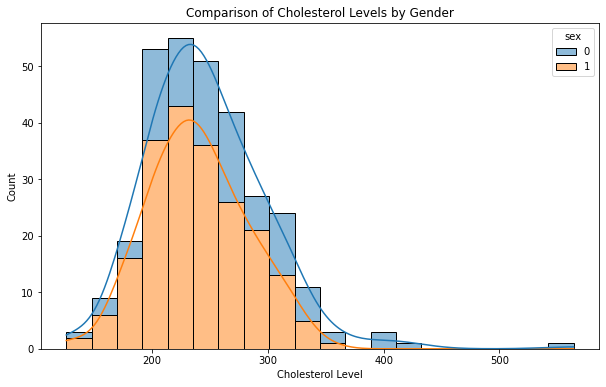

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='chol', hue='sex', multiple="stack", bins=20, kde=True)
plt.title('Comparison of Cholesterol Levels by Gender')
plt.xlabel('Cholesterol Level')
plt.ylabel('Count')
plt.show()

Saya asumsikan 0 adalah perempuan, 1 adalah laki-laki

Dari grafik tersebut kita dapat tahu bawha yang perempuan lebih banyak memiliki kolesterol dari pada laki-laki

### Train and Split Dataset

In [10]:
X = df.drop("output", axis=1)
y = df["output"]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

### Scaling

In [12]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

### Logistic Regression

In [13]:
Logreg = LogisticRegression(random_state=0)
Logreg.fit(X_train_scaled, y_train)

LogisticRegression(random_state=0)

In [14]:
ypred = Logreg.predict(X_test_scaled)
print(ypred)

[0 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 1 1 1 0 0 0 1 0 0 0 1 1 0]


In [15]:
ConMat = confusion_matrix(y_test,ypred)
print("Confusion Matrix \n", ConMat)

accuracy = accuracy_score(y_test,ypred)
print("Accuracy Score: ", accuracy)

Confusion Matrix 
 [[16  1]
 [ 2 12]]
Accuracy Score:  0.9032258064516129


### K-Nearest Neighbor

In [16]:
modelKNN = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
modelKNN.fit(X_train_scaled, y_train)

KNeighborsClassifier(metric='euclidean')

In [17]:
ypredKNN = modelKNN.predict(X_test_scaled)
print(ypred)

[0 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 1 1 1 0 0 0 1 0 0 0 1 1 0]


In [18]:
ConMat = confusion_matrix(y_test,ypredKNN)
print("Confusion Matrix \n", ConMat)

accuracy = accuracy_score(y_test,ypredKNN)
print("Accuracy Score: ", accuracy)

Confusion Matrix 
 [[17  0]
 [ 3 11]]
Accuracy Score:  0.9032258064516129


### Naive Bayes

In [19]:
modelNB = GaussianNB()
modelNB.fit(X_train_scaled, y_train)

GaussianNB()

In [20]:
ypredNB = modelNB.predict(X_test_scaled)
print(ypredNB)

[0 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 1 0]


In [21]:
ConMat = confusion_matrix(y_test,ypredNB)
print("Confusion Matrix \n", ConMat)

accuracy = accuracy_score(y_test,ypredNB)
print("Accuracy Score: ", accuracy)

Confusion Matrix 
 [[17  0]
 [ 2 12]]
Accuracy Score:  0.9354838709677419


Dari ketiga model tersebut, Logistic Regression dan KNN memiliki tingkat akurasi yang sama yaitu 0.9032258064516129, sedangkan Naive Bayes memiliki tingkat akurasi yang lebih tinggi dari Logistic Regression dan KNN yaitu 0.9354838709677419.